In [1]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('advertising.csv')

import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
# Some theory

> The regression sole purpose in life is to <b>find a straight line that best fits the data points</b>. 

-----

There are two main **applications** for finding best lines between variables:

<u><b> Describe: </b></u>
- Use <b> regression </b> to determine the strength of the relationship between the variable you are interested in and the other variables. 

<u><b> Predict: </b></u>
- Use <b> regression </b> to predict values of new data points. 

------

<u><b> Degrees of freedom </b></u>

A regression line is one of the simplest models. We say it has <b>few degrees of freedom</b>. Namely, a linear regression has <b> two degrees of freedom - the slope and the intercept. </b>

<u><b> Slope:</b></u> The angular coefficient of the linear regression. The greater this number is, the more impact of that specific variable on the Y variable.

<u><b> Intercept:</b></u> The value of Y for which X equals 0.

$$y = a + b x $$

$a \rightarrow$ intercept

$b \rightarrow$ slope

![title](lin_reg.png)

# Measuring your error.

## Error terms: 

<u>1. Residuals</u>

$Y_{observed} - Y_{predicted}$

<u>2. Sum of Residuals</u>

$\sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})$

- This might cancel the errors.

<u>3. Sum of square of residuals</u>

$\sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})^2$

- Heavily penalize higher error value.
- Not robust to outliers.


Linear regression looks for optimizing the intercept and coefficients such that it minimizes the objective function. The objective function is a simple measure of error: 


## <u> Objective Function (Cost Function)</u> 

Minimize the objective function:
- Objective function for **Mean** Squared Error (MSE): $\frac{1}{n} \sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})^2$



Since it tries to make the **mean** error as small as possible, how do you think outliers affect the linear regression?

<b> Outlier greatly affect the regression </b>

In practice:

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['TV']]
y = df['Sales']

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
y_observed = df['Sales']
y_predicted = model.predict(df[['TV']])

In [5]:
residual_squared = []

for y_o, y_p in list(zip(y_observed, y_predicted)):
    residual = y_o - y_p
    residual_squared.append(residual ** 2)


In [6]:
np.mean(residual_squared)

5.2177438977951285

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
mean_squared_error(y_observed, y_predicted)

5.2177438977951285

## interpreting the mean squared error

5.2 sales² $\rightarrow$ out of our variable scale

2.28 sales

The average mean error I will have in my prediction in sales is 2.28 if I use only the TV as my predictive variable.

## Coefficient of Determination $R^2$

What is important to understand?

> $R^2$ is a measure of how much information of our Y-variable is explained by our X-variable.

<font size="5">

$R^2 = 1 - \frac{\sum_{i = 1}^{n}(y_{observed} - y_{predicted})^2}{\sum_{i = 1}^{n}(y_{observed} - y_{mean})^2}$
    
</font>

- Numerator: ~variance of model's prediction
- Denominator: ~variance



### In practice

- `r2_score`

- `model.score()`

In [9]:
from sklearn.metrics import r2_score

The `r2_score` method expects you to pass the `y_observed` (that comes from the real data) and the values you predicted, `y_predicted` (that comes from the `model.predict(X)` method).

In [10]:
r2_score(y_observed, y_predicted)

0.8121757029987414

Also, you could use the model's  `model.score(X, y)` method.

In [11]:
model.score(X, y)

0.8121757029987413

## Using Newspaper

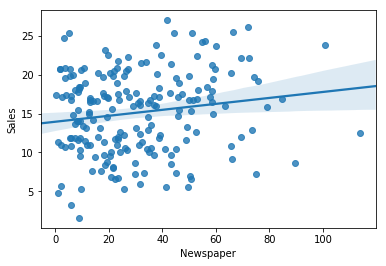

In [12]:
sns.regplot(df['Newspaper'], df['Sales'])

In [13]:
model = LinearRegression()

model.fit(df[['Newspaper']], df['Sales'])

model.score(df[['Newspaper']], df['Sales'])

0.024951369862864836

# Multiple Linear Regression

Same thing, except that now we'll use more than 1 predictor variable

$$y = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n$$

![title](mult_lin_reg.png)

In [14]:
X = df[['TV','Radio']]
y = df['Sales']

model.fit(X,y)

model.coef_

array([0.05444896, 0.10717457])

In [15]:
model.score(X, y)

0.9025896186081139

> Any number of variables can be used. It doesn't mean you should.

In [16]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [19]:
model.score(X, y)

0.9025896186081139

0.9025896186081139

In [20]:
X = df[['TV']]
y = df['Sales']
model.fit(X,y)
model.score(X, y)

0.8121757029987413

In [21]:
X = df[['Newspaper']]
y = df['Sales']
model.fit(X,y)
model.score(X, y)

0.024951369862864836

In [22]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

model.fit(X, y)
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

## Standardization (Z-score)

Standardize a variables means: transform it into a variable that has **mean = 0** and **standard deviation = 1**. In this manner, all variables are scaled to the same scale!

$$X_{std} = \frac{X - \mu}{\sigma}$$

$\mu \rightarrow$ média

$\sigma \rightarrow$ desvio padrão

<br><br>
<b>Understanding:</b>

If $X_{std}$ > 0 $\rightarrow$ it means that that specific observation is <u>above average</u>

If $X_{std}$ < 0 $\rightarrow$ it means that that specific observation is <u>below average</u>

If $X_{std}$ = 0 $\rightarrow$ it means that that specific observation is <u>the average</u>

If $X_{std}$ = 1 $\rightarrow$ it means that that specific observation is <u>1 standard deviation above average</u>

If $X_{std}$ = -2 $\rightarrow$ it means that that specific observation is <u>2 standard deviations below average</u>


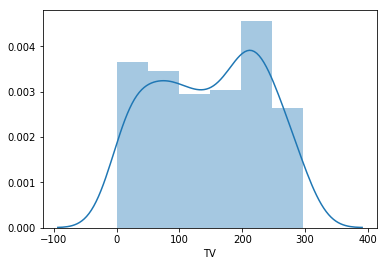

In [23]:
sns.distplot(X.TV)

In [24]:
# poor way to Standardize

X_std = (X - X.mean())/X.std()

In [25]:
X_std.kurtosis()

TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
dtype: float64

In [26]:
X_std.loc[X_std.Newspaper > 3, :]

,TV,Radio,Newspaper
16,-0.922989,0.898240,3.831556
101,1.739664,0.878034,3.230048


In [27]:
X_std

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


In [28]:
# good way to Standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [29]:
np.mean(X_std)

-2.960594732333751e-17

In [30]:
model = LinearRegression()

model.fit(X_std, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.coef_

array([4.66270025, 1.58465027, 0.00729187])

In [32]:
model.intercept_

15.130500000000001

In [33]:

# the mean error I would have in sales is:
np.sqrt(mean_squared_error(y_observed, model.predict(X_std)))

1.6449942697855564

# StatsModel

In [34]:
import statsmodels.api as sm

In [35]:
X.tail()

,TV,Radio,Newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [37]:
sm.add_constant(X)

C:\Users\andreaguiar\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [38]:


# to calculate intercepts, statsmodel requires you to 'add a constant' (column of ones on your dataframe)
X = sm.add_constant(X)

'''
_______________________
 1  230.1  37.8  69.2        | a0 | = y1 
 1  44.5   39.3  45.1        | a1 | = y2
 1   ...                   x | a2 | = ...
 1                           | a3 | 
 1                           
 1  232.1  8.6   8.7                = y_n      
-----------------------
'''

## OLS (Ordinary Least Squares) has a different standard (y comes before X)
model = sm.OLS(y,X)

## Fitting doesn't require X and y (since you already passed it beforehand)
results = model.fit()

## predict is the same
predictions = results.predict(X)

In [39]:
## statsmodel has some good reports
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           8.13e-99
Time:                        14:34:06   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""